# Kernelized Support Vector Machine(SVM)

## 1) 선형 모델과 비선형 특성
* 직선과 초평면(Hyper Plane)은 유연하지 못하며 적용할 수 있는 데이터세이 매우 제한적임
* 선형 모델을 유연하게 만드는 방법 중 하나는 특성(feature)끼리 곱하거나 제곱 등의 방식을 이용하여 새로운 feature를 추가하는 방법이 있음

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

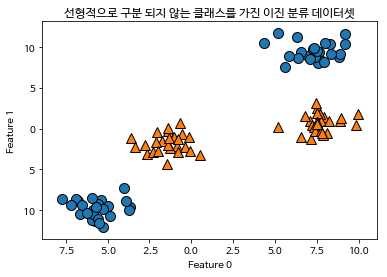

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y =y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("선형적으로 구분 되지 않는 클래스를 가진 이진 분류 데이터셋")

* 선형 모델을 이용하여 분류를 할 경우 데이터를 직선으로만 나눌 수 있어 적절하지 않음

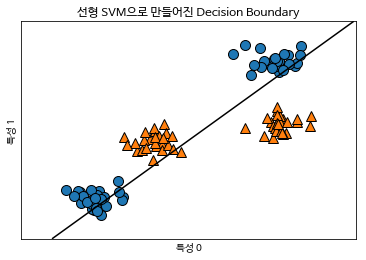

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.title('선형 SVM으로 만들어진 Decision Boundary')

* *특성1* 을 제곱한 (특성1)<sup>2</sup> 를 새로운 feature로 추가하여 [특성0, 특성1, 특성1<sup>2</sup>]인 3차원으로 확장

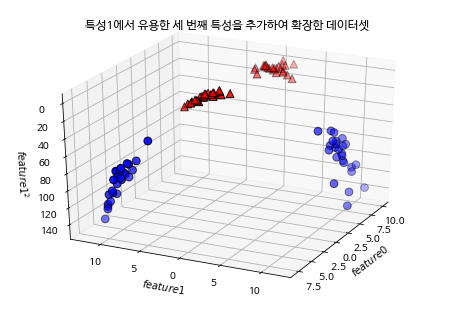

In [8]:
# 두번째 특성을 제곱하여 추가(특성1 ** 2)
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# Label이 y == 0인 포인트를 먼저 그리고 그다음 y == 1 인 포인트를 그림
mask = y == 0 # True or False
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask,2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("$feature0$")
ax.set_ylabel("$feature1$")
ax.set_zlabel("$feature1^2$")
plt.title('특성1에서 유용한 세 번째 특성을 추가하여 확장한 데이터셋')

* 확장된 데이터셋에 선형모델(LinearSVC) 적용

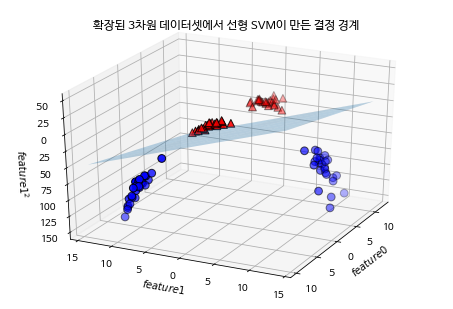

In [11]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Decision Boundary 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("$feature0$")
ax.set_ylabel("$feature1$")
ax.set_zlabel("$feature1^2$")
plt.title('확장된 3차원 데이터셋에서 선형 SVM이 만든 결정 경계')

* 원래의 특성인 (feature0, feature1) 2차원으로 투영(projection)해보면 직선이 아닌 타원형으로 나타남

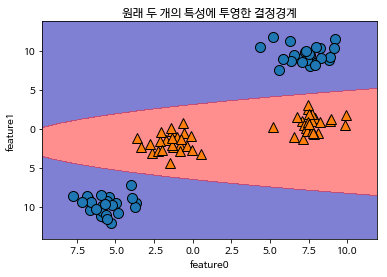

In [12]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature0")
plt.ylabel("feature1")
plt.title("원래 두 개의 특성에 투영한 결정경계")

## 2) 커널 기법<sup>kernel trick</sup>
* 위의 데이터셋에 새로운 특성(feature1$^2$)을 추가하여 선형 모델을 적용할 수 있도록 해주었지만, 이러한 방법은 특성이 많이 추가될 수록 계산 비용이 커지는 문제가 있음
* 이러한 문제를 해결할 수 있는 방법이 바로 **커널트릭<sup>kernel trick</sup>**이며, 실제로 데이터를 확장하지 않고, 확장된 특성에 대한 데이터 포인트들의 거리를 계산한다.
* 대표적인 커널트릭에는 **다항식 커널(Polynomial kernel)** 과 **RBF(Radial Basis Function)** 이 있음
* **RBF** kernel은 가우시안 커널<sup>Gaussian kernel</sup> 이라고도 하며, 식은 다음과 같다
$$ K_{rbf}(x_1, x_2) = exp(-\gamma\left\| x_1-x_2 \right\|^2) $$

## 3) [scikit-learn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* scikit-learn이 제공하는 Support Vector Classicification 클래스

### SVC's Parameters
* **C** : Regularization(규제)의 강도를 결정하는 parameter `C` 값이 작아야지 더 많은 *error*를 수용한다. `C` 값이 클 수록 모델이 복잡해짐
* **kernel** : 커널트릭을 설정하는 parameter **default='rbf'** 이며, 'linear', 'poly', 'rbf', 'sigmoid' 등 에서 선택 가능함
* **gamma** : 커널의 폭을 제어하는 parameter이며, 하나의 훈련 샘플(데이터)이 미치는 영향의 범위를 결정. **gamma** 의 값이 **클수록** 모델이 복잡해짐. 'rbf', 'poly', 'sigmoid' 커널에서 사용. **default='auto'** 이며, 'auto'일 경우 `1/n_feautres` (특성개수의 역수)임

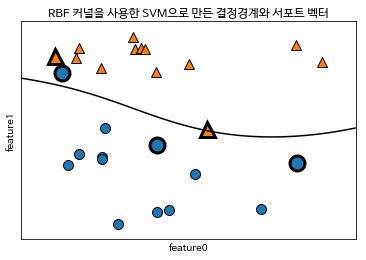

In [13]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Support Vector
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 support vector의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature0")
plt.ylabel("feature1")
plt.title('RBF 커널을 사용한 SVM으로 만든 결정경계와 서포트 벡터')

## 4) SVM parameter 튜닝

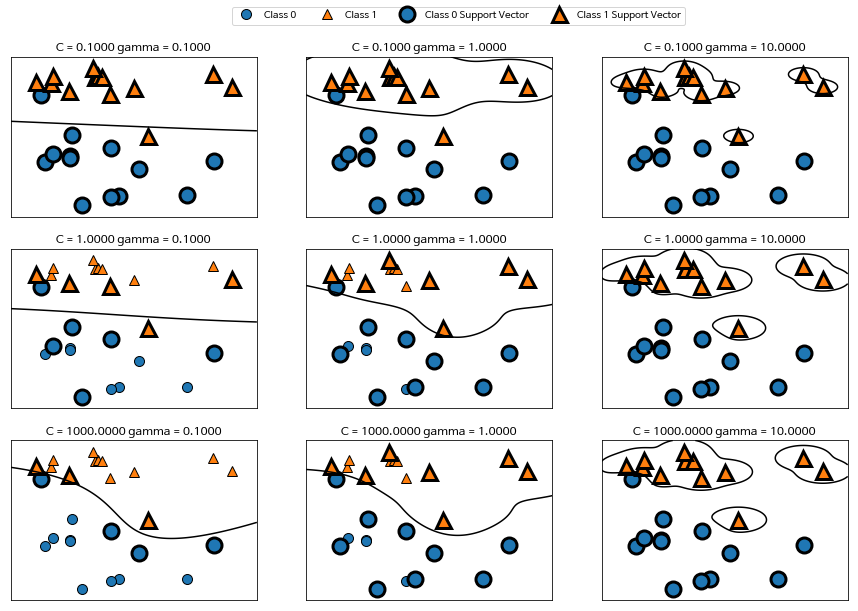

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["Class 0", "Class 1", "Class 0 Support Vector", 
                   "Class 1 Support Vector"], ncol=4, loc=(.9, 1.2))

### 위스콘신 유방암 데이터셋 적용

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

* Training set에서는 정확도가 1이지만 Test set에서는 0.63으로 Training set에 overfitting되어 있는 것을 알 수 있음

In [16]:
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


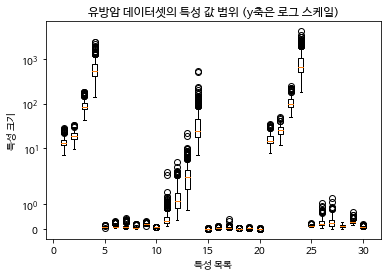

In [22]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog") # 각 특성(feature)의 최소값과 최대값을 로그 스케일로 나타냄
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.title('유방암 데이터셋의 특성 값 범위 (y축은 로그 스케일)')

* 위의 그래프에서 알 수 있듯이 유방암 데이터셋은 각 특성(Feature) 별로 값의 크기가 매우 다름을 알 수 있다. 이 문제를 해결하기 위해 특성 값의 범위가 비슷해지도록 조정하는 방법이 있다. 
* Kernel SVM에서는 모든 특성(feature)값을 0과 1 사이로 맞춰주는 방법을 많이 사용한다. 
$$ \cfrac { X - min(X) }{ max(X) - min(X) } $$

In [23]:
# Training set의 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
# Training Set의 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# MinMaxScale 적용
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature \n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature \n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature 
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [24]:
# Test set에도 같은 스케일 작업을 적용
# 대신, Training set에서 계산한 최소값(min)과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [25]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [27]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972
